In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.ticker as mtick
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
import sklearn
print(sklearn.__version__)

1.5.2


In [3]:
data=pd.read_csv("C:/Users/rsing/Downloads/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.shape

(768, 9)

In [7]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
100*data.Outcome.value_counts()/len(data.Outcome)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


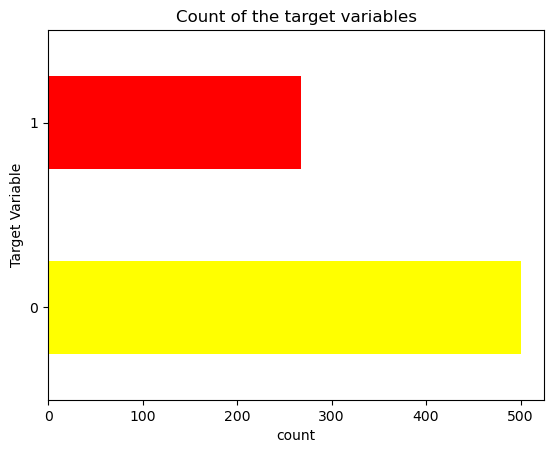

In [10]:
color=['yellow', 'red']
data.Outcome.value_counts().plot(kind='barh', color=color)
plt.xlabel('count')
plt.ylabel('Target Variable')
plt.title('Count of the target variables')
plt.show()

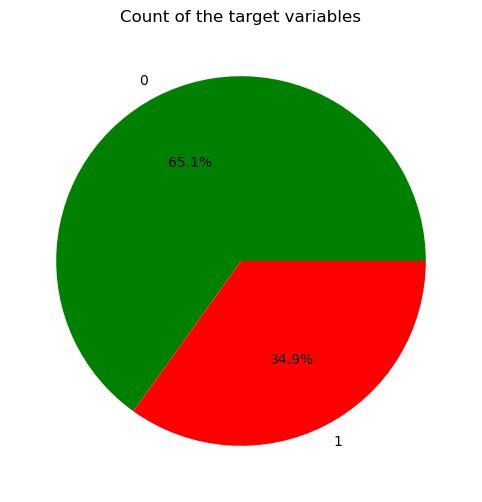

In [11]:
plt.figure(figsize=(10,6))
colors=['green', 'red']
data.Outcome.value_counts().plot(kind='pie', colors=colors, autopct='%1.1f%%')
plt.ylabel('')
plt.title('Count of the target variables')
plt.show()

In [12]:
data.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

In [13]:
data.Age.max()

81

In [14]:
data.Age.min()

21

In [15]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [16]:
df=data

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='BMI', ylabel='Glucose'>

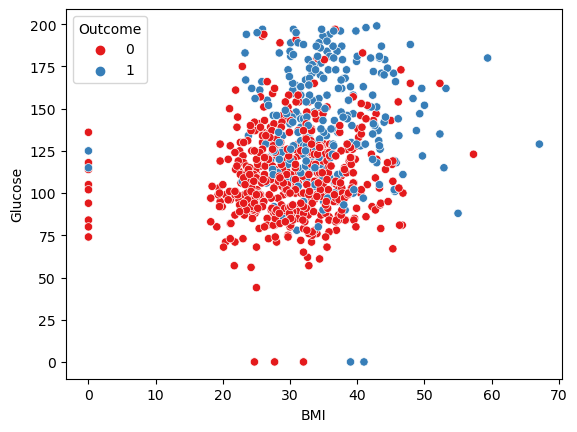

In [19]:
sns.scatterplot(data=df, x='BMI', y='Glucose', hue='Outcome', palette='Set1')

<Axes: xlabel='Glucose', ylabel='Count'>

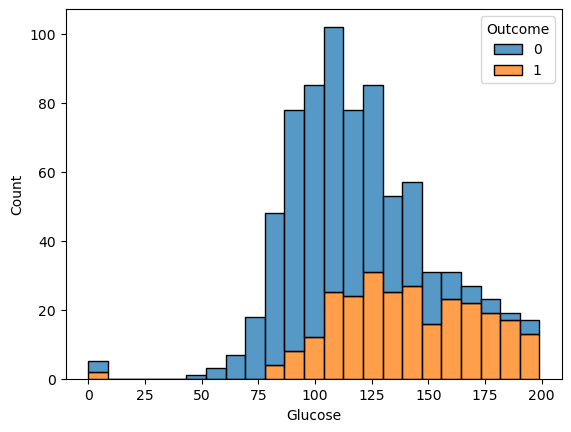

In [20]:
sns.histplot(data=df, x='Glucose', hue='Outcome', multiple='stack')

<Axes: xlabel='BMI', ylabel='Count'>

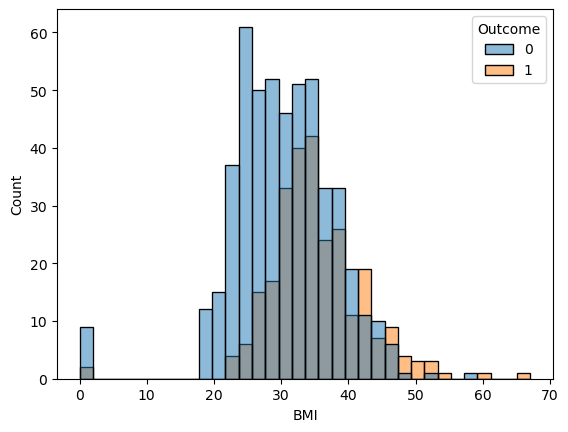

In [21]:
sns.histplot(data=df, x='BMI', hue='Outcome')

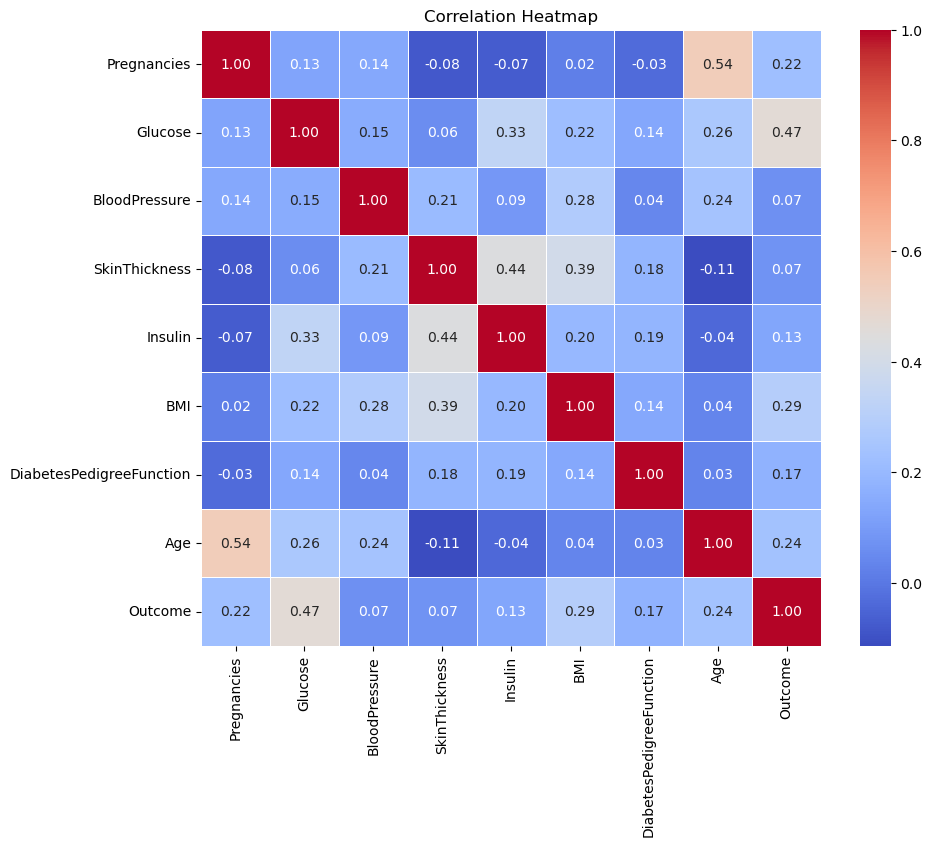

In [22]:
plt.figure(figsize=(10, 8))

numerical_data=df.select_dtypes(include=['float64', 'int64'])
correlation = numerical_data.corr()


sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Correlation Heatmap')
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
x= df.drop(columns=['Outcome'], axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [26]:
y = df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [27]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.2,random_state=100)

In [29]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(614, 8) (614,) (154, 8) (154,)


# Logistic Regression

In [30]:
model=LogisticRegression()
model.fit(x_train, y_train)

C:\Users\rsing\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred= model.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [32]:
model.score(x_test, y_test)

0.7792207792207793

In [33]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       100
           1       0.75      0.56      0.64        54

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



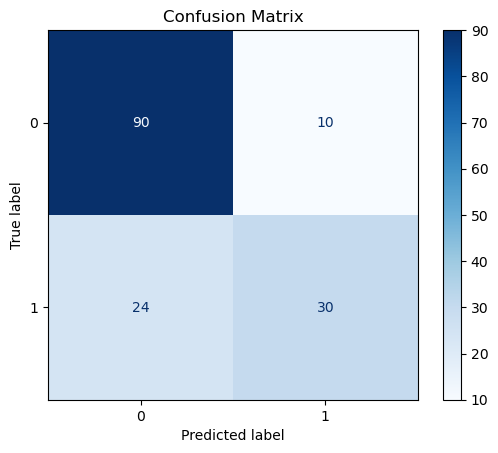

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [35]:
print((85+32)/(85+15+22+32)*100)

75.97402597402598


In [36]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [37]:
from imblearn.combine import SMOTEENN

In [38]:
sm=SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x,y)

In [39]:
xl_train, xl_test, yl_train, yl_test = train_test_split(x_resampled, y_resampled, test_size=0.2)

In [40]:
model_log_sm = LogisticRegression()
model_log_sm.fit(xl_train, yl_train)

C:\Users\rsing\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_log_pred= model_log_sm.predict(xl_test)
print(classification_report(yl_test, y_log_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        46
           1       0.92      0.97      0.94        60

    accuracy                           0.93       106
   macro avg       0.94      0.93      0.93       106
weighted avg       0.93      0.93      0.93       106



In [42]:
model_log_sm.score(xl_test, yl_test)

0.9339622641509434

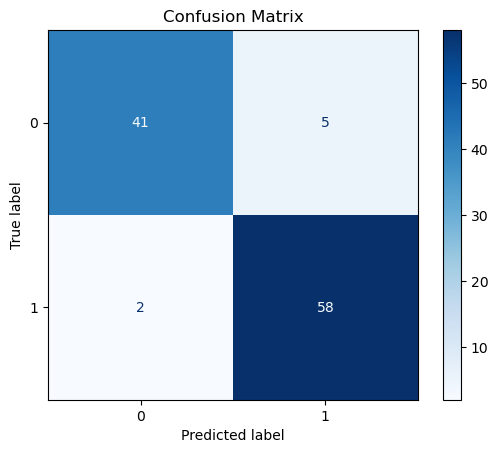

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(yl_test, y_log_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [44]:
print((34+61)/(34+3+5+61)*100)

92.23300970873787


# Decision Tree

In [45]:
model_dt = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [46]:
y_dt_pred= model_dt.predict(x_test)
y_dt_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [47]:
model_dt.score(x_test, y_test)

0.7662337662337663

In [48]:
print(classification_report(y_test, y_dt_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       100
           1       0.68      0.63      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



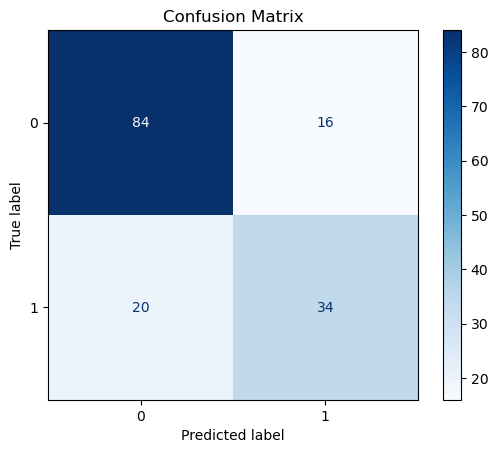

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_dt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [50]:
print((82+32)/(82+18+22+32)*100)

74.02597402597402


In [51]:
sm=SMOTEENN()
x_resampled1, y_resampled1= sm.fit_resample(x,y)

In [52]:
xdt_train, xdt_test, ydt_train, ydt_test= train_test_split(x_resampled1, y_resampled1, test_size=0.2)

In [53]:
model_dt_sm=DecisionTreeClassifier(criterion='gini',random_state=100, max_depth=6, min_samples_leaf=8)
model_dt_sm.fit(xdt_train, ydt_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [54]:
y_dt_pred_sm = model_dt_sm.predict(xdt_test)
model_dt_score=model_dt_sm.score(xdt_test, ydt_test)
print(model_dt_score)

0.9339622641509434


In [55]:
print(classification_report(ydt_test, y_dt_pred_sm))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.93      0.97      0.95        67

    accuracy                           0.93       106
   macro avg       0.94      0.92      0.93       106
weighted avg       0.93      0.93      0.93       106



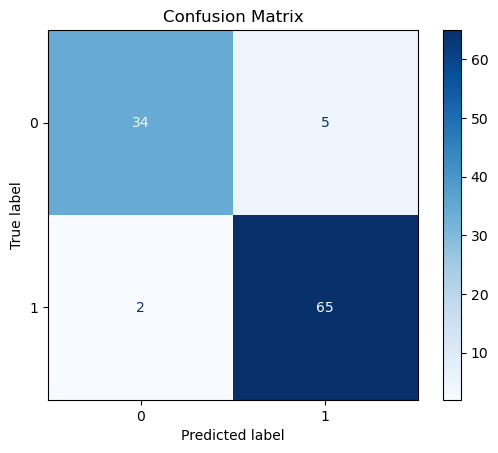

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(ydt_test, y_dt_pred_sm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [57]:
print((45+50)/(45+3+2+50)*100)

95.0


# Random  Forest

In [58]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [59]:
y_rf_pred=model_rf.predict(x_test)

In [60]:
model_rf.score(x_test, y_test)

0.7662337662337663

In [61]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       100
           1       0.70      0.57      0.63        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



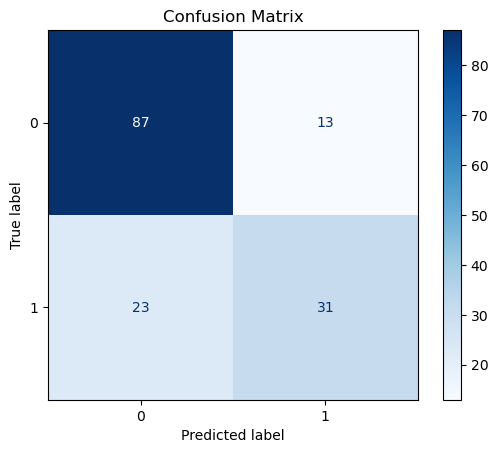

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [63]:
print((89+31)/(89+11+23+31)*100)

77.92207792207793


In [64]:
sm=SMOTEENN()
x_resample2, y_resampled2= sm.fit_resample(x,y)

In [65]:
xrf_train, xrf_test, yrf_train, yrf_test = train_test_split(x_resample2, y_resampled2, test_size=0.2)

In [66]:
model_rf_sm=RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
model_rf_sm.fit(xrf_train, yrf_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [67]:
yrf_pred_sm = model_rf_sm.predict(xrf_test)
yrf_pred_sm

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0],
      dtype=int64)

In [68]:
model_rf_sm.score(xrf_test, yrf_test)

0.9444444444444444

In [69]:
print(classification_report(yrf_test, yrf_pred_sm))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        47
           1       0.95      0.95      0.95        61

    accuracy                           0.94       108
   macro avg       0.94      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108



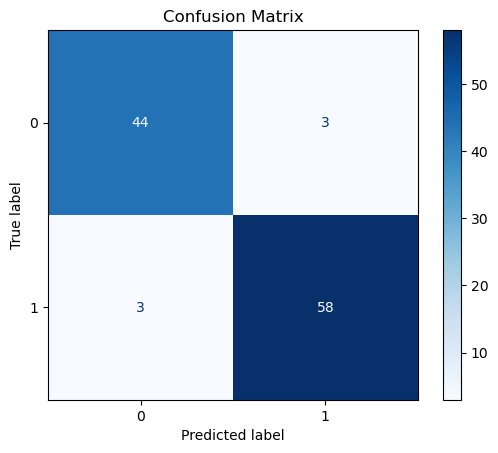

In [70]:
cm = confusion_matrix(yrf_test, yrf_pred_sm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [71]:
print((32+64)/(32+5+3+64)*100)

92.3076923076923


Decision Tree model is more accurate compare to other models. so finalize RF Classifier, and save the model so that we can use it in a later stage

In [73]:
import pickle

filename = 'Diabetes2.sav'

pickle.dump(model_dt_sm, open(filename, 'wb'))

load_model = pickle.load(open(filename, 'rb'))

model_dt_score = load_model.score(xdt_test, ydt_test)

model_dt_score

0.9339622641509434